This notebook is part of the research paper titled:

Optimizing acetogenic CO(2) utilization through metabolic and process engineering highlights the potential of thermophilic bioproduction

# Gas-liquid mass transfer

This notebook expresses the transfer rates of the gaseous substrates from the gas to the liquid phase as a function of temperature. This transfer accross the phase boundary is modelled using film theory.

Notebook author: Philip J. Gorter de Vries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image

## Bubble column setup:

Before calculating transfer rates of compounds, it important to determine the properties of the reactor. The reactor setup used in the simulations is based on Redl et al. 30-meter-tall bubble column reactor with a radius of 3 meters, filled to 2/3 of its volume. It is continuously fed with 10 000 m3/h of syngas, which is assumed to consist of 40% CO, 20% CO2, and 40% H2. 

The temperature range used is between 0-80°C, corresponding to 273.15-353.15K. 

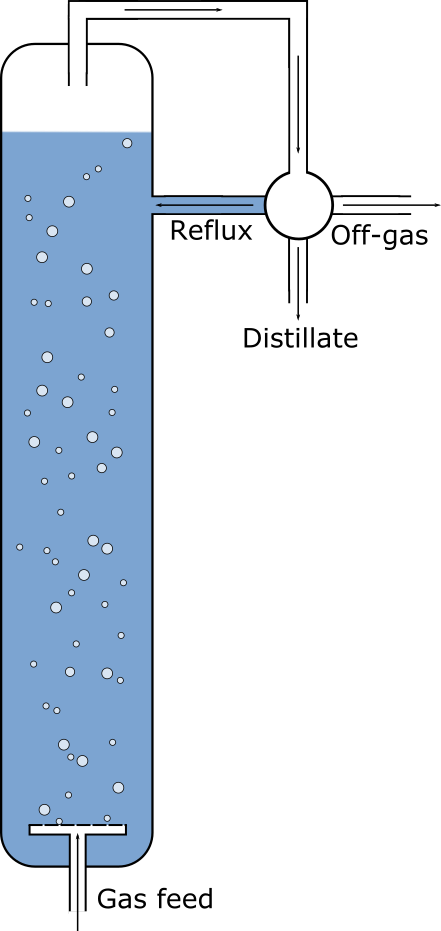

In [26]:
#Universal constants:
R = 8.314 # 

#Temperature range:
T0 = 273.15
dt = 80

T = np.arange(T0, T0+dt+1, 1)

def Kelvin_Celsius(t):
    """
    This function converts Temperature values from Kelvin to degrees Celsius
    """
    return t-273.15

def Celsius_Kelvin(t):
    """
    This function converts Temperature values from degrees Celsius to Kelvin
    """
    return t+273.15

F_G = 1*10**4 #gas inflow rate (from Steph: (8*10**5 * 8.314 * T)/p_m) [m^3/h]
r = 3 # radius of the reactor [m]
h = 30 # height of the reactor [m]

#deduceable constants
A = math.pi * r**2 #reactor cross-sectional area [m^2]
V_L = A * h * 2/3 #reactor volume, assuming it is 2/3 filled [m^3]
v_gas = F_G/A/3600 #average gas velocity [m/s]
#Gas_holdup = 0.6*(v_gas)**0.7 #from Stephanie's paper
#V_G = V_L*Gas_holdup

p_t = 101325 # pressure at the top of the reactor [Pa]
p_b = p_t + h * 2/3 * 1000 * 9.81 # pressure at the bottom of the reactor [Pa]
p_m = (p_b-p_t)/math.log(p_b/p_t) # logarithmic mean pressure [Pa]

#define concentration of disolved gasses as minimum
c_co2 = c_co = c_h2 = c_o2 = 0

Image(filename='../Figures/BubbleColumnSingle.png', width = 200)

### Process Parameters
Further parameters, including the superficial gas velocity (vcgs), the liquid volume (VL), the gas holdup fraction (ε), the pressure at the bottom of the tank (Pb), and the logarithmic mean pressure (Pm) can be defined from the basic properties of the reactor (eq. 1-5).

<p> Superficial gas velocity: </p>
<div style="text-align: center">  $ v^c_{gs} = F_av/(\pi * r^2)/3600 $ [m/s]
    <span style="float:right;">(eq. 1)</span>
</div>

<p> Liquid volume, assuming 2/3 filled: </p> 
<div style="text-align: center">  $ V_L = π * r^2 * h * 2/3 $ [$m^3$]
    <span style="float:right;">(eq. 2)</span>
</div>

<p> Gas holdup fraction: </p> 
<div style="text-align: center">  $ \varepsilon = 0.6*(v^c_{gs})^{0.7} $     
    <span style="float:right;">(eq. 3)</span>
</div>

<p> Pressure at the bottom, assuming 2/3 filled: </p> 
<div style="text-align: center">  $ P_b = P_t + h * 2/3 * 1000 * g $ [Pa]
    <span style="float:right;">(eq. 4)</span>
</div>

<p> Logarithmic mean pressure: </p> 
<div style="text-align: center">  $ P_m = (P_b-P_t)/log(P_b/P_t) $ [Pa]
    <span style="float:right;">(eq. 5)</span>
</div>

# Define gas transfer rates as functions of temperature

The transfer of a compound across a phase boundary can be modelled using film theory. In film theory, the division between two phases is seen as a boundary where each phase forms a film providing resistance to the mass transfer. The mass transfer through each of the boundary films (R) can be expressed for any compound as a function of a coefficient (k), the surface area of the interface (a), and the concentration difference (Δc) between the bulk of the phase and the interface (eq. 6).

<p> Transfer rate: </p>
<div style="text-align: center">  $ R = k_L * a * \Delta c $ [$mol/m^3/s$]
    <span style="float:right;">(eq. 6)</span>
</div>

<p> Transfer rate: </p>
<div style="text-align: center">  $ R_{i} = k_La_T*(c^* -c_l) $ [$mol/m^3/s$]
    <span style="float:right;">(eq. 7)</span>
</div>

<p> Volumetric mass transfer coefficient: </p>
<div style="text-align: center">  $ k_La_{20} = 0.32 * (D_i/D_{O_2})^{0.5} * (v^c_{gs})^{0.7} $ [$1/s$]
    <span style="float:right;">(eq. 8)</span>
</div>

<p> Temperature corrected volumetric mass transfer coefficient: </p>
<div style="text-align: center">  $ k_La_T = k_La_{20} * \theta ^{T-293.15} $ [$1/s$]
    <span style="float:right;">(eq. 9)</span>
</div>

<p> Saturation concentration: </p>
<div style="text-align: center">  $ c^* = H_T*y*P $ [$mol/m^3$]
    <span style="float:right;">(eq. 10)</span>
</div>

<p> Temperature-corrected Henry’s law constant: </p>
<div style="text-align: center">  $ H_T = H_0*e^{[k*((1/T)-(1/298.15))]} $ [$mol/m^3*Pa$]
    <span style="float:right;">(eq. 11)</span>
</div>

<!--<p> Combined: </p>
<div style="text-align: center">  $ k_La_T = 0.32 * (D_i/D_{O_2})^{0.5} * (v^c_{gs})^{0.7} * \theta ^{T-293.15} $ </div>
<div style="text-align: center">  $ c^* = H_0*e^{[k*((1/T)-(1/298.15))]}*10^3*y*P $ </div>-->


In [3]:
# Constants:
# Diffusivity coefficient:
# E.L. Cussler, Diffusion - Mass Transfer in Fluid Systems, 2nd edition - Table 5.2-1
D0_CO = 2.03*10**(-5) #[cm2/s]
D0_CO2 = 1.92*10**(-5) #[cm2/s]
D0_H2 = 4.50*10**(-5) #[cm2/s]
D0_O2 = 2.10*10**(-5) #[cm2/s]
D0_N2 = 1.88*10**(-5) #[cm2/s]

# NIST Chemistry WebBook: https://webbook.nist.gov
theta = 1.022 # temperature correction factor
#Henry's law constant for solubility in water at 298.15 K, converted using density of water.
H0_CO = 0.00099 * 1000 # [mol/m3*Pa]
H0_CO2 = 0.035 * 1000 # [mol/m3*Pa]
H0_H2 = 0.00078 * 1000 # [mol/m3*Pa]
H0_O2 = 0.0013 * 1000 # [mol/m3*Pa]
H0_N2 = 0.0006 * 1000 # [mol/m3*Pa]

#temperature correction factor k 
kh_CO = 1300 # [K]
kh_CO2 = 2400 # [K]
kh_H2 = 500 # [K]
kh_O2 = 1500 # [K]
kh_N2 = 1300 # [K]

## Define and plot the volumetric mass transfer coefficient KLa

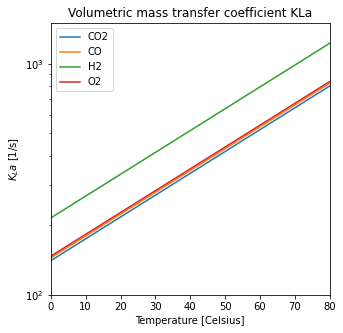

In [4]:
def KLa_CO2(t):
    return 0.32 * (D0_CO2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

def KLa_CO(t):
    return 0.32 * (D0_CO/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

def KLa_H2(t):
    return 0.32 * (D0_H2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

def KLa_O2(t):
    return 0.32 * (1)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]

fig = plt.figure(figsize=(5,5))
plt.title(f"Volumetric mass transfer coefficient KLa")
plt.plot(Kelvin_Celsius(T), KLa_CO2(T))
plt.plot(Kelvin_Celsius(T), KLa_CO(T))
plt.plot(Kelvin_Celsius(T), KLa_H2(T))
plt.plot(Kelvin_Celsius(T), KLa_O2(T))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 100, 1500])
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'$K_La$ [1/s]')
plt.yscale('log')

plt.show()

## Define and plot the Henry's law constant as a function of temperature

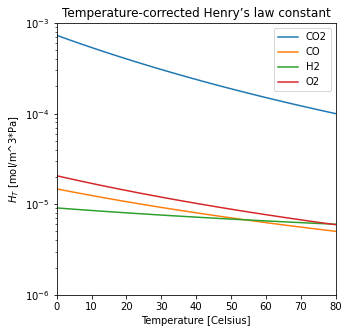

In [5]:
def HT_CO2(t):
    return H0_CO2 * math.e**(kh_CO2*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]

def HT_CO(t):
    return H0_CO * math.e**(kh_CO*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]

def HT_H2(t):
    return H0_H2 * math.e**(kh_H2*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]

def HT_O2(t):
    return H0_O2 * math.e**(kh_O2*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]

t = np.arange(293.15, 332.15, 1)

fig = plt.figure(figsize=(5,5))
plt.title(f"Temperature-corrected Henry’s law constant")
plt.plot(Kelvin_Celsius(T), HT_CO2(T))
plt.plot(Kelvin_Celsius(T), HT_CO(T))
plt.plot(Kelvin_Celsius(T), HT_H2(T))
plt.plot(Kelvin_Celsius(T), HT_O2(T))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'$H_T$ [mol/m^3*Pa]')
#plt.axis([293, 333, 0.000001, 0.00042])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 0.000001, 0.001])
plt.yscale('log')

plt.show()

## Define and plot the volumetric gas transfer rates as a function of temperature

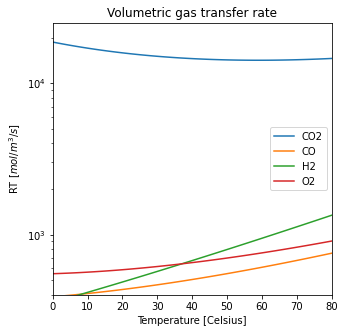

H2 fold increase 30-80˚C:  2.35
CO2 fold increase 30-80˚C:  0.97
CO fold increase 30-80˚C:  1.62
O2 fold increase 30-80˚C:  1.47


In [6]:
def R_CO2(t):
    #DT_CO = t/298.15 * 1/(((298.15+118)/(t+118))*(t/298.15)**(3/2)) * D0_CO #[cm2/s]
    #DT_O2 = t/298.15 * 1/(((298.15+127)/(t+127))*(t/298.15)**(3/2)) * D0_O2 #[cm2/s]
    KLa_CO2 = 0.32 * (D0_CO2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_CO2 = H0_CO2 * math.e**(kh_CO2*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]
    return KLa_CO2 * (HT_CO2 * p_m - c_co2)

def R_CO(t):
    #DT_CO = t/298.15 * 1/(((298.15+118)/(t+118))*(t/298.15)**(3/2)) * D0_CO #[cm2/s]
    #DT_O2 = t/298.15 * 1/(((298.15+127)/(t+127))*(t/298.15)**(3/2)) * D0_O2 #[cm2/s]
    KLa_CO = 0.32 * (D0_CO/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_CO = H0_CO * math.e**(kh_CO*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]
    return KLa_CO * (HT_CO * p_m - c_co)

def R_H2(t):
    #DT_H2 = t/298.15 * 1/(((298.15+72)/(t+72))*(t/298.15)**(3/2)) * D0_H2 #[cm2/s]
    #DT_O2 = t/298.15 * 1/(((298.15+127)/(t+127))*(t/298.15)**(3/2)) * D0_O2 #[cm2/s]
    KLa_H2 = 0.32 * (D0_H2/D0_O2)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_H2 = H0_H2 * math.e**(kh_H2*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]
    return KLa_H2 * (HT_H2 * p_m - c_h2)

def R_O2(t):
    KLa_O2 = 0.32 * (1)**0.5 * v_gas**0.7 * theta**(t-293.15) * 3600 #[1/s]
    HT_O2 = H0_O2 * math.e**(kh_O2*(1/t-1/298.15)) * 10**(-5) #[mol/m^3*Pa]
    return KLa_O2 * (HT_O2 * p_m - c_o2)

fig = plt.figure(figsize=(5,5))

plt.title(f"Volumetric gas transfer rate")
plt.plot(Kelvin_Celsius(T), R_CO2(T))
plt.plot(Kelvin_Celsius(T), R_CO(T))
plt.plot(Kelvin_Celsius(T), R_H2(T))
plt.plot(Kelvin_Celsius(T), R_O2(T))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 400, 25000])
plt.yscale('log')
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'RT [$mol/m^3/s$]')

plt.show()

print("H2 fold increase 30-80˚C: ", round(R_H2(Celsius_Kelvin(80))/R_H2(Celsius_Kelvin(30)),2))
print("CO2 fold increase 30-80˚C: ", round(R_CO2(Celsius_Kelvin(80))/R_CO2(Celsius_Kelvin(30)),2))
print("CO fold increase 30-80˚C: ", round(R_CO(Celsius_Kelvin(80))/R_CO(Celsius_Kelvin(30)),2))
print("O2 fold increase 30-80˚C: ", round(R_O2(Celsius_Kelvin(80))/R_O2(Celsius_Kelvin(30)),2))

## Define and plot the saturation concentration as a function of temperature

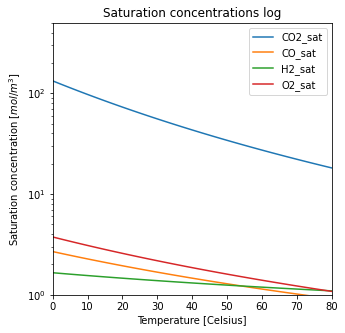

In [7]:
def CO2_sat(t):
    return H0_CO2 * math.e**(kh_CO2*(1/t-1/298.15)) * 10**(-5) * p_m

def CO_sat(t):
    return H0_CO * math.e**(kh_CO*(1/t-1/298.15)) * 10**(-5) * p_m

def H2_sat(t):
    return H0_H2 * math.e**(kh_H2*(1/t-1/298.15)) * 10**(-5) * p_m

def O2_sat(t):
    return H0_O2 * math.e**(kh_O2*(1/t-1/298.15)) * 10**(-5) * p_m

t = np.arange(293.15, 335.15, 1)

fig = plt.figure(figsize=(5,5))
plt.title(f"Saturation concentrations log")
plt.plot(Kelvin_Celsius(T), CO2_sat(T))
plt.plot(Kelvin_Celsius(T), CO_sat(T))
plt.plot(Kelvin_Celsius(T), H2_sat(T))
plt.plot(Kelvin_Celsius(T), O2_sat(T))
plt.legend(['CO2_sat', 'CO_sat', 'H2_sat', 'O2_sat'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 1, 500])
plt.xlabel('Temperature [Celsius]')
plt.ylabel(r'Saturation concentration [$mol/m^3$]')
plt.yscale('log')

plt.show()

# Gathered Plots

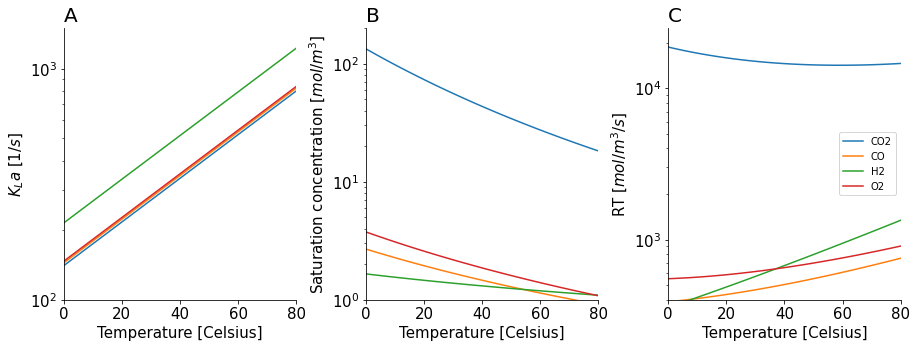

In [8]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, constrained_layout=False, figsize=(15,5))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

#Output results
plt.subplot(1,3,2)
#plt.title(f"Saturation concentrations")
plt.title("B", fontdict = {'fontsize': 20}, loc = "left")
plt.plot(Kelvin_Celsius(T), CO2_sat(T))
plt.plot(Kelvin_Celsius(T), CO_sat(T))
plt.plot(Kelvin_Celsius(T), H2_sat(T))
plt.plot(Kelvin_Celsius(T), O2_sat(T))
#plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 1, 200])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'Saturation concentration [$mol/m^3$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log')

plt.subplot(1,3,1)
#plt.title(f"Volumetric mass transfer coefficient KLa")
plt.title("A", fontdict = {'fontsize': 20}, loc = "left")
plt.plot(Kelvin_Celsius(T), KLa_CO2(T))
plt.plot(Kelvin_Celsius(T), KLa_CO(T))
plt.plot(Kelvin_Celsius(T), KLa_H2(T))
plt.plot(Kelvin_Celsius(T), KLa_O2(T))
#plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 100, 1500])
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'$K_La$ [$1/s$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.yscale('log')

plt.subplot(1,3,3)
#plt.title(f"Volumetric gas transfer rate")
plt.title("C", fontdict = {'fontsize': 20}, loc = "left")
plt.plot(Kelvin_Celsius(T), R_CO2(T))
plt.plot(Kelvin_Celsius(T), R_CO(T))
plt.plot(Kelvin_Celsius(T), R_H2(T))
plt.plot(Kelvin_Celsius(T), R_O2(T))
plt.legend(['CO2', 'CO', 'H2', 'O2'])
plt.axis([Kelvin_Celsius(T0), Kelvin_Celsius(T0)+dt, 400, 25000], )
plt.yscale('log')
plt.xlabel('Temperature [Celsius]', fontsize=15)
plt.ylabel(r'RT [$mol/m^3/s$]', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)